# B.Tech 2016-20 Electrical Enginnering (Spring 2018)

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import json
from scipy.stats import norm

In [2]:
with open('stres.json') as f:
    data = json.load(f)
    # Filter out 16EE data
    data = {k:v for (k,v) in data.items() if '16EE' in k[:4]}
    
for (k,v) in data.items():
    print(k,v['cgpa'][1])
    
with open('course.json') as c:
    cdata = json.load(c)
    
print ("Total Stuents: %s" % len(data))


16EE01010 8.89
16EE01015 7.87
16EE01019 8.55
16EE01042 8.94
16EE01012 7.36
16EE01041 9.47
16EE01040 6.79
16EE01004 8.00
16EE01029 7.40
16EE01028 8.34
16EE01001 9.26
16EE01021 8.21
16EE01023 7.19
16EE01022 7.94
16EE01025 7.89
16EE01024 9.60
16EE01027 6.53
16EE01026 6.55
16EE01039 6.04
16EE01032 6.85
16EE01031 7.79
16EE01036 8.00
16EE01037 6.11
16EE01034 6.87
16EE01033 7.64
16EE01030 8.72
16EE01006 8.15
16EE01003 8.53
16EE01011 9.00
16EE01009 9.21
16EE01035 7.77
16EE01013 8.64
16EE01014 8.38
16EE01016 8.23
16EE01002 7.30
16EE01008 8.57
16EE01017 8.30
16EE01005 6.85
Total Stuents: 38


## Date of Birth analysis

In [3]:
dob = [v['dob'] for (k, v) in data.items()]

np_dob = (np.array(dob, dtype='datetime64[s]').view('i8'))
average_dob = np.mean(np_dob).astype('datetime64[s]').astype(dt.datetime)
median_dob  = np.median(np_dob).astype('datetime64[s]').astype(dt.datetime)
minimum_dob = np.min(np_dob).astype('datetime64[s]').astype(dt.datetime)
maximum_dob = np.max(np_dob).astype('datetime64[s]').astype(dt.datetime)
print (" Average: %s" % average_dob.strftime("%8B %d, %Y"))
print ("  Median: %s" % median_dob.strftime("%8B %d, %Y"))
print ("  Oldest: %s" % minimum_dob.strftime("%8B %d, %Y"))
print ("Youngest: %s" % maximum_dob.strftime("%8B %d, %Y"))

 Average:     June 14, 1998
  Median:      May 09, 1998
  Oldest: February 02, 1997
Youngest: November 14, 1999


## Branch Change Analysis

In [9]:
original_strengeth = 40
bc_cgpa = [v['cgpa'][1] for (k, v) in data.items() if (int(k[-2:]) > 40 and v['cgpa'][2] !='WH')]
cgpa = [v['cgpa'][2] for (k,v) in data.items() if v['cgpa'][2] != 'WH' ]

bc_cgpa = (np.array(bc_cgpa, dtype='float'))
cgpa = (np.array(cgpa, dtype='float'))

if len(bc_cgpa>0):
    bc_count = bc_cgpa.size
    bc_highest = np.max(bc_cgpa)
    bc_lowest = np.min(bc_cgpa)
    bc_average = np.mean(bc_cgpa)
    bc_median = np.median(bc_cgpa)
    bc_std = np.std(bc_cgpa)
    print ("Total branch changers: %s" % bc_count)
    print ("\nCGPA (after 2nd sem) for branch change:-")
    print ("Highest: %s" % bc_highest)
    print (" Lowest: %s" % bc_lowest)
    print ("Average: %s" % bc_average)
    print (" Median: %s" % bc_median)
    print("Standard Deviation: %s " %bc_std)
else:
    print('no branch changer')
    pass


Total branch changers: 2

CGPA (after 2nd sem) for branch change:-
Highest: 9.47
 Lowest: 8.94
Average: 9.205
 Median: 9.205
Standard Deviation: 0.26500000000000057 


## Course wise analysis

In [5]:
courses = dict()
for (k, v) in data.items():
    for (sem, scourses) in v['grades'].items():
        for (course, grade) in scourses.items():
            if course not in courses:
                courses[course] = list()
                courses[course].append(grade)
            else:
                courses[course].append(grade)

clist = list()

def other_grade(l):
    return len(l) - l.count('EX') - l.count('A') - l.count('B') - l.count('C') - l.count('D') - l.count('P') - l.count('F') - l.count('WH')

def analyze_grade(l):
    grade_hash = {'EX': 10, 'A': 9, 'B': 8, 'C': 7, 'D': 6, 'P': 5, 'F': 5}
    hashed_grade = list()
    for grade in l:
        if grade in grade_hash:
            hashed_grade.append(grade_hash[grade])
    hashed_grade = (np.array(hashed_grade, dtype='float'))
    if hashed_grade.size == 0:
        return {'average': 0, 'median': 0}
    return {'average': round(np.mean(hashed_grade), 2), 'median': round(np.median(hashed_grade), 2)}

grade_labels = 'EX', 'A', 'B', 'C', 'D', 'P', 'F', 'WH', 'Other'
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'orange', 'red', 'gray', 'black']

for course, grades in courses.items():
    course_info = cdata[course]
    clist.append((course, course_info['subnane'], course_info['credit'], len(grades), grades.count('EX'), grades.count('A'), 
                 grades.count('B'), grades.count('C'), grades.count('D'), grades.count('P'),
                 grades.count('F'), grades.count('WH'), other_grade(grades), analyze_grade(grades)['average'], analyze_grade(grades)['median']))
#     patches, texts = plt.pie([grades.count('EX'), grades.count('A'), 
#                  grades.count('B'), grades.count('C'), grades.count('D'), grades.count('P'),
#                  grades.count('F'), grades.count('WH'), other_grade(grades)], labels=grade_labels, colors=colors)
#     plt.axis('equal')
#     plt.legend(patches, labels, loc="best")
#     plt.show()
def sortByAverage(element):
    return element[-2]

clist.sort(key=sortByAverage)
df = pd.DataFrame(data = clist)
df.columns = ['Subject Code', 'Subject Name', 'Credits', 'Students', 'EX', 'A', 'B', 'C', 'D', 'P', 'F', 'WH', 'Other', 'Average', 'Median']

df

,Subject Code,Subject Name,Credits,Students,EX,A,B,C,D,P,F,WH,Other,Average,Median
0,ME1L001,Mechanics,4,38,1,4,8,7,11,7,0,0,0,6.84,7.0
1,EE2L001,Network Theory,3,38,2,3,8,7,8,7,1,2,0,6.89,7.0
2,HS2L004,Odissi Dance - I,3,4,0,0,1,2,1,0,0,0,0,7.00,7.0
3,CE2L011,Building materials and Construction,3,20,0,1,8,3,5,2,0,1,0,7.05,7.0
4,EC2L001,Introduction to Electronics,4,38,1,7,8,10,6,6,0,0,0,7.18,7.0
5,HS2L002,Speaking and Presentation,4,21,0,3,6,6,3,2,0,1,0,7.25,7.0
6,HS1L002,Learning English,4,29,0,3,10,12,2,2,0,0,0,7.34,7.0
7,PH1L001,Physics,4,38,1,5,13,10,6,3,0,0,0,7.37,7.5
8,MA2L003,Probability Statistics and Stochastic Processes,4,38,5,7,5,9,6,6,0,0,0,7.42,7.0
9,MA1L002,Mathematics - II,4,38,5,6,9,9,5,4,0,0,0,7.61,8.0


## CGPA Analysis

Top 5 Students:

16EE01024  AKASH MOHAPATRA  9.41
16EE01041  AYUSH SHARMA  9.36
16EE01001  MANAPURAM JYOTHI VENKATA SAI ADITYA  9.30
16EE01011  DEBJIT CHATTOPADHYAY  9.21
16EE01010  KAUSTAV BHATTACHARYA  9.08

CGPA:
Highest: 9.41
lowest: 5.63
 Median: 8.02
Average: 7.87
Standard Deviation: 0.95 

   9.5+: 0
  9-9.5: 5
  8.5-9: 5
  8-8.5: 10
  7.5-8: 6
  7-7.5: 4
     7-: 8




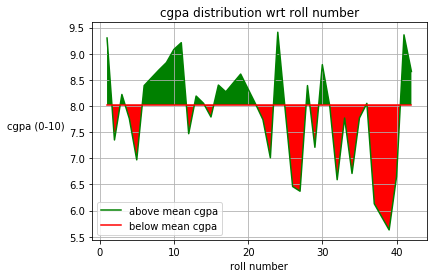

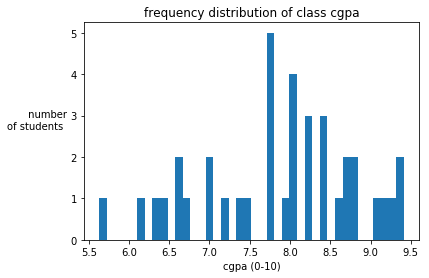

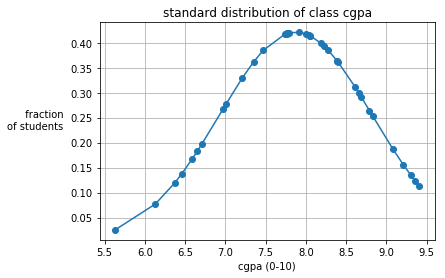

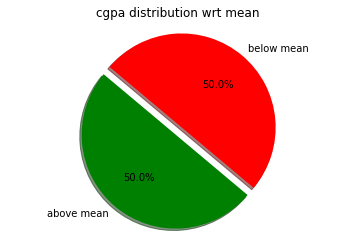

In [8]:

roll_and_cgpa = []
for (k, v) in data.items():
    try:
        roll_and_cgpa.append((k,float(v['cgpa'][2])))
    except:
        pass

    

def sortbycg(l):
   return l[1]

def sortbyroll(l):
    return int(l[0][7:9])


sorted_cgpa = roll_and_cgpa[:]
sorted_cgpa.sort(key=sortbycg)


print("Top 5 Students:\n")
for element in sorted_cgpa[:-6:-1]:
    print('%s '%(element[0]),'%s ' % (data[element[0]]['name']),'%s' %(data[element[0]]['cgpa'][2]))
    
roll_and_cgpa.sort(key=sortbyroll)

# for individual cgpa 

# print("Students with theri cgpa :\n")
# for element in roll_and_cgpa:
#     print('%s '%(element[0]),'%s ' % (data[element[0]]['name']),'%s' %(data[element[0]]['cgpa'][2]))

cgpa = np.array([element[1] for element in roll_and_cgpa], dtype='float')

roll = np.array([element[0][7:9] for element in roll_and_cgpa],dtype='int')


cgpa_average = round(np.mean(cgpa), 2)
cgpa_median = round(np.median(cgpa), 2)
cgpa_highest = round(np.max(cgpa), 2)
cgpa_lowest = round(np.min(cgpa),2)
cgpa_standard_deviation = round(np.std(cgpa),2)

print("\nCGPA:")
print("Highest: %s" % cgpa_highest)
print("lowest: %s"% cgpa_lowest)
print(" Median: %s" % cgpa_median)
print("Average: %s" % cgpa_average)
print("Standard Deviation: %s \n"% cgpa_standard_deviation)

print("   9.5+: %s" % len([cg for cg in cgpa if cg >= 9.5]))
print("  9-9.5: %s" % len([cg for cg in cgpa if cg >= 9 and cg < 9.5]))
print("  8.5-9: %s" % len([cg for cg in cgpa if cg >= 8.5 and cg < 9]))
print("  8-8.5: %s" % len([cg for cg in cgpa if cg >= 8 and cg < 8.5]))
print("  7.5-8: %s" % len([cg for cg in cgpa if cg >= 7.5 and cg < 8]))
print("  7-7.5: %s" % len([cg for cg in cgpa if cg >= 7 and cg < 7.5]))
print("     7-: %s" % len([cg for cg in cgpa if cg < 7]))


unit_array = np.ones(len(roll),dtype='int')
fig,cgpa_plot = plt.subplots()

print('\n')

label=['above mean','below mean']
cgpa_plot.plot(roll,cgpa,label='above mean cgpa',color='green')
cgpa_plot.plot(roll,cgpa_median*unit_array,label='below mean cgpa',color='red')
cgpa_plot.grid(b = True)
cgpa_plot.legend()
cgpa_plot.fill_between(roll,cgpa,cgpa_median*unit_array,where= cgpa >= cgpa_median*unit_array,facecolor = 'green',interpolate = True )
cgpa_plot.fill_between(roll,cgpa,cgpa_median*unit_array,where= cgpa< cgpa_median*unit_array,facecolor = 'red',interpolate = True )
plt.xlabel('roll number')
plt.ylabel('cgpa (0-10)', horizontalalignment='right',rotation =0)
plt.title('cgpa distribution wrt roll number')
plt.show()

print('\n')
#plt.fill(cgpa,cgpa_median*median,'r')g
sorted_cgpa=cgpa[:]
sorted_cgpa.sort()
fig,histo_cgpa = plt.subplots()
histo_cgpa.hist(sorted_cgpa,bins=40)
#histo_cgpa.fill_between(roll,histo_cgpa,where =sorted_cgpa >= 8.0,facecolor = 'green',interpolate = True )
#histo_cgpa.fill(histo_cgpa, where = sorted_cgpa >= cgpa_median)
plt.title('frequency distribution of class cgpa')

plt.xlabel('cgpa (0-10)')
plt.ylabel(' number\nof students ', horizontalalignment='right',rotation =0)
plt.show()
#plt.plot(norm.pdf(cgpa_in_seq,cgpa_median,cgpa_standard_deviation))

print('\n')
fig = norm.pdf(sorted_cgpa, np.mean(sorted_cgpa), np.std(sorted_cgpa))
plt.plot(sorted_cgpa,fig,'-o')
plt.title('standard distribution of class cgpa')
plt.xlabel('cgpa (0-10)')
plt.ylabel(' fraction \nof students ', horizontalalignment='right',rotation =0)
plt.grid(b = True)
plt.show()

above_mean = [cg for cg in cgpa if cg >= cgpa_median]
below_mean = [cg for cg in cgpa if cg < cgpa_median]

print('\n')
labels = 'above mean','below mean'
sizes = [len(above_mean),len(below_mean)]
#print(len(above_mean),len(below_mean))
explode = (0.1,0)
colors = ['green','red']
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%2.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.title('cgpa distribution wrt mean')
plt.show()

# results plot 
this plot shows that students from roll number between 1 to 24 shows a good aveage performance while those at the roll number between 32 to 40 have very low average. these students need to receive better support in coming semester to impove their performance.




https://analytics4all.org/2016/05/05/python-histograms-and-frequency-distribution/

https://etav.github.io/python/count_basic_freq_plot.html for histogram frequency distribution

https://stackoverflow.com/questions/20011494/plot-normal-distribution-with-matplotlib for ploting the standard deviation